In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_datetime64_any_dtype as is_datetime


In [4]:
root = Path('/workspace/CMT307-Coursework-2-Group-19/all-code') # Change the path to the source file path, use Memory_Management.py to generate files in feather format 
train_df = pd.read_feather(root/'train.feather')
weather_train_df = pd.read_feather(root/'weather_train.feather')
building_meta_df = pd.read_feather(root/'building_metadata.feather')

In [5]:
print('\n--- Shape of train data ---\n', train_df.shape)


--- Shape of train data ---
 (20216100, 4)


In [6]:
print('\n---Information of the train data --- \n')
print(train_df.info())


---Information of the train data --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int16         
 1   meter          int8          
 2   timestamp      datetime64[ns]
 3   meter_reading  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1)
memory usage: 289.2 MB
None


In [7]:
print('\n ---Column names of the train data --- \n', train_df.columns)


 ---Column names of the train data --- 
 Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')


In [8]:
print('\n---Below is the statistics of the train data---\n\n',train_df.describe())


---Below is the statistics of the train data---

         building_id         meter  meter_reading
count  2.021610e+07  2.021610e+07   2.021610e+07
mean   7.992780e+02  6.624412e-01   2.117122e+03
std    4.269133e+02  9.309921e-01   1.532356e+05
min    0.000000e+00  0.000000e+00   0.000000e+00
25%    3.930000e+02  0.000000e+00   1.830000e+01
50%    8.950000e+02  0.000000e+00   7.877500e+01
75%    1.179000e+03  1.000000e+00   2.679840e+02
max    1.448000e+03  3.000000e+00   2.190470e+07


In [9]:
print('\n---Below is the first 5 lines of the train data---\n',train_df.head(5))


---Below is the first 5 lines of the train data---
    building_id  meter  timestamp  meter_reading
0            0      0 2016-01-01            0.0
1            1      0 2016-01-01            0.0
2            2      0 2016-01-01            0.0
3            3      0 2016-01-01            0.0
4            4      0 2016-01-01            0.0


In [10]:
print('\n--- Shape of weather_train data---\n', weather_train_df.shape)


--- Shape of weather_train data---
 (139773, 9)


In [11]:
print('\n---Information of the weather_train dataset --- \n')
print(weather_train_df.info())


---Information of the weather_train dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int8          
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float32       
 3   cloud_coverage      70600 non-null   float32       
 4   dew_temperature     139660 non-null  float32       
 5   precip_depth_1_hr   89484 non-null   float32       
 6   sea_level_pressure  129155 non-null  float32       
 7   wind_direction      133505 non-null  float32       
 8   wind_speed          139469 non-null  float32       
dtypes: datetime64[ns](1), float32(7), int8(1)
memory usage: 4.9 MB
None


In [12]:
print('\n ---Column names of the weather_train dataset --- \n', weather_train_df.columns)


 ---Column names of the weather_train dataset --- 
 Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')


In [13]:
print('\n---Below is the statistics of the weather_train dataset---\n\n',weather_train_df.describe())


---Below is the statistics of the weather_train dataset---

              site_id  air_temperature  cloud_coverage  dew_temperature  \
count  139773.000000    139718.000000    70600.000000    139660.000000   
mean        7.478977        14.418107        2.149306         7.350158   
std         4.604744        10.626595        2.599150         9.790235   
min         0.000000       -28.900000        0.000000       -35.000000   
25%         3.000000         7.200000        0.000000         0.600000   
50%         7.000000        15.000000        2.000000         8.300000   
75%        11.000000        22.200001        4.000000        14.400000   
max        15.000000        47.200001        9.000000        26.100000   

       precip_depth_1_hr  sea_level_pressure  wind_direction     wind_speed  
count       89484.000000       129155.000000   133505.000000  139469.000000  
mean            0.983047         1016.158081      180.526627       3.560527  
std             8.463677            7

In [14]:
print('\n---Below is the first 5 lines of the weather_train dataset---\n',weather_train_df.head(5))


---Below is the first 5 lines of the weather_train dataset---
    site_id           timestamp  air_temperature  cloud_coverage  \
0        0 2016-01-01 00:00:00        25.000000             6.0   
1        0 2016-01-01 01:00:00        24.400000             NaN   
2        0 2016-01-01 02:00:00        22.799999             2.0   
3        0 2016-01-01 03:00:00        21.100000             2.0   
4        0 2016-01-01 04:00:00        20.000000             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN         1019.700012             0.0   
1             21.1               -1.0         1020.200012            70.0   
2             21.1                0.0         1020.200012             0.0   
3             20.6                0.0         1020.099976             0.0   
4             20.0               -1.0         1020.000000           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3     

In [15]:
print('\n--- Shape of building_meta data---\n', building_meta_df.shape)


--- Shape of building_meta data---
 (1449, 6)


In [16]:
print('\n---Information of the building_metadata dataset --- \n')
print(building_meta_df.info())


---Information of the building_metadata dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   site_id      1449 non-null   int8    
 1   building_id  1449 non-null   int16   
 2   primary_use  1449 non-null   category
 3   square_feet  1449 non-null   int32   
 4   year_built   675 non-null    float32 
 5   floor_count  355 non-null    float32 
dtypes: category(1), float32(2), int16(1), int32(1), int8(1)
memory usage: 23.4 KB
None


In [17]:
print('\n ---Column names of the building_meta dataset --- \n', building_meta_df.columns)


 ---Column names of the building_meta dataset --- 
 Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')


In [18]:
print('\n---Below is the statistics of the building_meta dataset---\n\n',building_meta_df.describe())


---Below is the statistics of the building_meta dataset---

            site_id  building_id    square_feet   year_built  floor_count
count  1449.000000  1449.000000    1449.000000   675.000000   355.000000
mean      6.952381   724.000000   92111.776398  1967.957031     3.740845
std       5.003432   418.434583  110769.950997    31.054029     3.333683
min       0.000000     0.000000     283.000000  1900.000000     1.000000
25%       3.000000   362.000000   23012.000000  1949.000000     1.000000
50%       5.000000   724.000000   57673.000000  1970.000000     3.000000
75%      13.000000  1086.000000  115676.000000  1995.000000     5.000000
max      15.000000  1448.000000  875000.000000  2017.000000    26.000000


In [19]:
print('\n---Below is the first 5 lines of the building_meta dataset---\n',building_meta_df.head(5))


---Below is the first 5 lines of the building_meta dataset---
    site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN


Reducing the memory usage of the data 

In [20]:
def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(
        100 * (start_mem - end_mem) / start_mem))

    return df

In [21]:
train_df=reduce_mem_usage(train_df,'Train data')
weather_train_df=reduce_mem_usage(weather_train_df,'Weather train data')
building_meta_df=reduce_mem_usage(building_meta_df,'Building meta data')

Memory usage of dataframe is 289.19 MB
Memory usage after optimization is: 289.19 MB
Decreased by 0.0%
Memory usage of dataframe is 4.93 MB
Memory usage after optimization is: 3.07 MB
Decreased by 37.8%
Memory usage of dataframe is 0.02 MB
Memory usage after optimization is: 0.02 MB
Decreased by 24.2%


Merging data 

In [22]:
train_merge = train_df.merge(building_meta_df, on='building_id', how='left')
train_merge = train_merge.merge(weather_train_df, on=['site_id', 'timestamp'], how='left')

In [23]:
print('\n--- Shape of merging data---\n', train_merge.shape)


--- Shape of merging data---
 (20216100, 16)


In [24]:
print('\n---Information of the train_merge dataset --- \n')
print(train_merge.info())


---Information of the train_merge dataset --- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   timestamp           datetime64[ns]
 3   meter_reading       float32       
 4   site_id             int8          
 5   primary_use         category      
 6   square_feet         int32         
 7   year_built          float16       
 8   floor_count         float16       
 9   air_temperature     float16       
 10  cloud_coverage      float16       
 11  dew_temperature     float16       
 12  precip_depth_1_hr   float16       
 13  sea_level_pressure  float16       
 14  wind_direction      float16       
 15  wind_speed          float16       
dtypes: category(1), datetime64[ns](1), float16(9), float32(1), int16(1), int32(1), int8(2)
memory usage: 906.1 MB
N

In [25]:
print('\n ---Column names of the train_merge dataset --- \n', train_merge.columns)


 ---Column names of the train_merge dataset --- 
 Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')


In [26]:
print('\n---Below is the statistics of the train_merge dataset---\n\n',train_merge.describe())


---Below is the statistics of the train_merge dataset---

         building_id         meter  meter_reading       site_id   square_feet  \
count  2.021610e+07  2.021610e+07   2.021610e+07  2.021610e+07  2.021610e+07   
mean   7.992780e+02  6.624412e-01   2.117122e+03  7.992232e+00  1.077830e+05   
std    4.269133e+02  9.309921e-01   1.532356e+05  5.099060e+00  1.171424e+05   
min    0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  2.830000e+02   
25%    3.930000e+02  0.000000e+00   1.830000e+01  3.000000e+00  3.252700e+04   
50%    8.950000e+02  0.000000e+00   7.877500e+01  9.000000e+00  7.270900e+04   
75%    1.179000e+03  1.000000e+00   2.679840e+02  1.300000e+01  1.391130e+05   
max    1.448000e+03  3.000000e+00   2.190470e+07  1.500000e+01  8.750000e+05   

       year_built  floor_count  air_temperature  cloud_coverage  \
count   8088455.0    3506933.0     2.011944e+07      11390735.0   
mean          NaN          NaN              NaN             NaN   
std           NaN 

In [27]:
print('\n---Below is the first 5 lines of the train_merge dataset---\n',train_merge.head(5))


---Below is the first 5 lines of the train_merge dataset---
    building_id  meter  timestamp  meter_reading  site_id primary_use  \
0            0      0 2016-01-01            0.0        0   Education   
1            1      0 2016-01-01            0.0        0   Education   
2            2      0 2016-01-01            0.0        0   Education   
3            3      0 2016-01-01            0.0        0   Education   
4            4      0 2016-01-01            0.0        0   Education   

   square_feet  year_built  floor_count  air_temperature  cloud_coverage  \
0         7432      2008.0          NaN             25.0             6.0   
1         2720      2004.0          NaN             25.0             6.0   
2         5376      1991.0          NaN             25.0             6.0   
3        23685      2002.0          NaN             25.0             6.0   
4       116607      1975.0          NaN             25.0             6.0   

   dew_temperature  precip_depth_1_hr  sea_level

Correlation 

/tmp/ipykernel_639/3496030572.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train=train_df.corr()


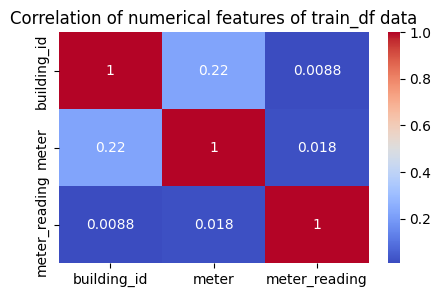

In [28]:
corr_train=train_df.corr()

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_train,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of train_df data')
plt.show()

/tmp/ipykernel_639/2618776826.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_weather=weather_train_df.corr()


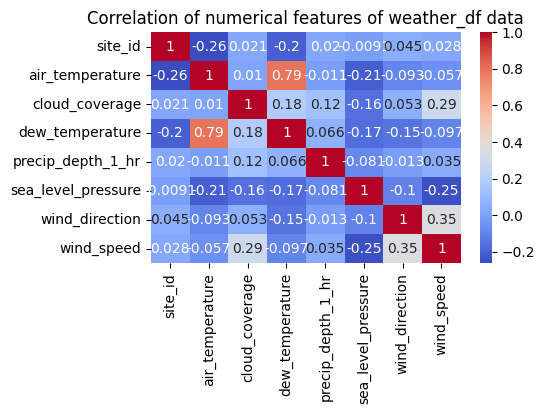

In [29]:
corr_weather=weather_train_df.corr()

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_weather,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of weather_df data')
plt.show()

/tmp/ipykernel_639/3420211853.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_building=building_meta_df.corr()


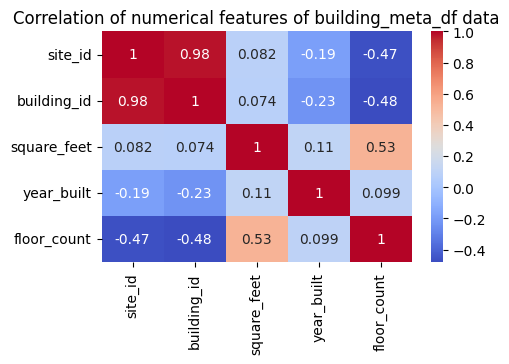

In [30]:
corr_building=building_meta_df.corr()

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_building,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of building_meta_df data')
plt.show()

/tmp/ipykernel_639/2321367793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=train_merge.corr()


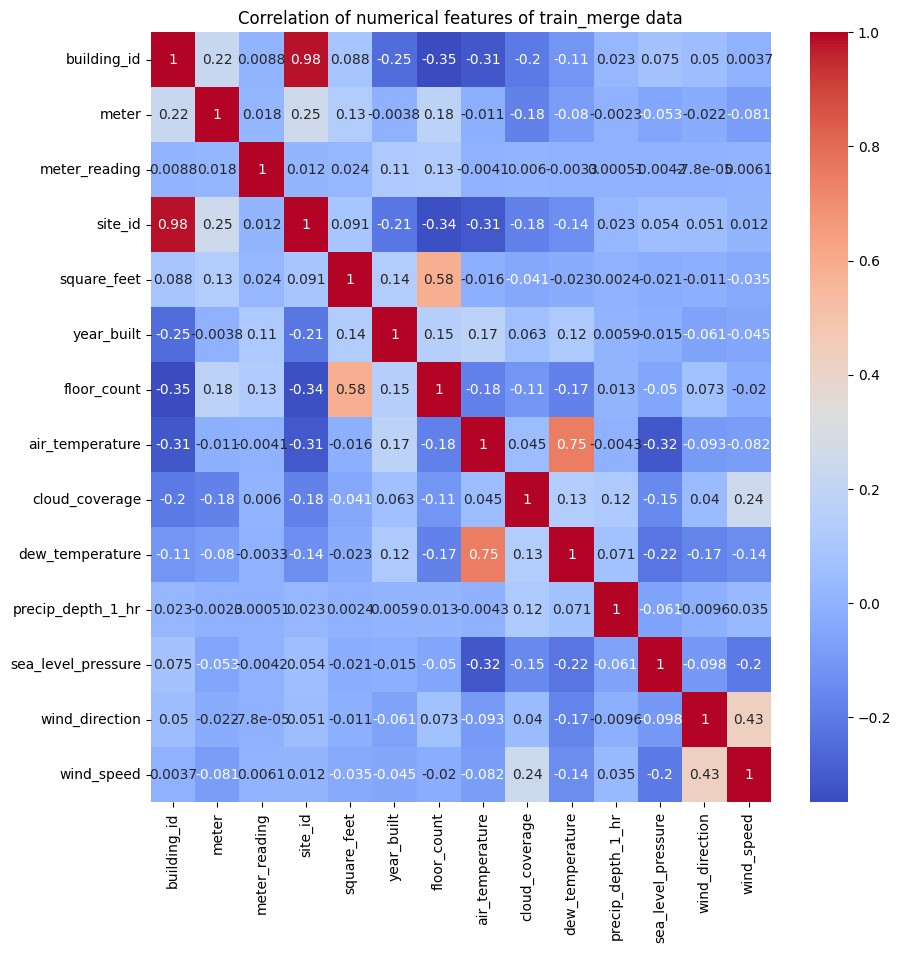

In [31]:
correlation=train_merge.corr()

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(correlation,annot=True,cmap='coolwarm')
ax.set_title('Correlation of numerical features of train_merge data')
plt.show()

Check the null values 

In [32]:
null_train = train_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_train)

               NaN count
building_id            0
meter                  0
timestamp              0
meter_reading          0


In [33]:
null_weather = weather_train_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_weather)

                    NaN count
site_id                     0
timestamp                   0
air_temperature            55
cloud_coverage          69173
dew_temperature           113
precip_depth_1_hr       50289
sea_level_pressure      10618
wind_direction           6268
wind_speed                304


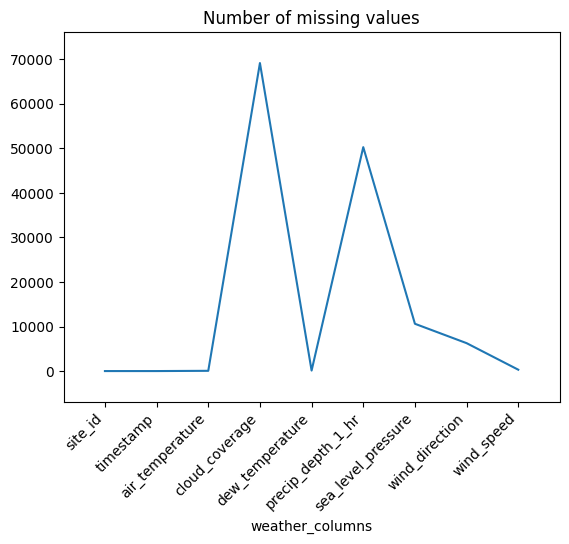

In [34]:
weather_columns=weather_train_df.columns
plt.plot(null_weather.index, null_weather['NaN count'])
plt.xticks(null_weather.index, null_weather.index, rotation=45,horizontalalignment='right')
plt.xlabel('weather_columns')
plt.title('Number of missing values')
plt.margins(0.1)
plt.show()

In [35]:
null_building = building_meta_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_building)

             NaN count
site_id              0
building_id          0
primary_use          0
square_feet          0
year_built         774
floor_count       1094


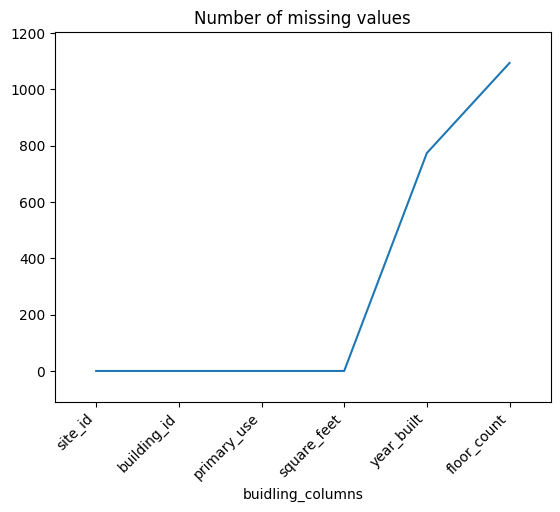

In [36]:
building_columns=building_meta_df.columns
plt.plot(null_building.index, null_building['NaN count'])
plt.xticks(null_building.index, null_building.index, rotation=45,horizontalalignment='right')
plt.xlabel('buidling_columns')
plt.title('Number of missing values')
plt.margins(0.1)
plt.show()

In [37]:
null_train_merge = train_merge.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_train_merge)

                    NaN count
building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
year_built           12127645
floor_count          16709167
air_temperature         96658
cloud_coverage        8825365
dew_temperature        100140
precip_depth_1_hr     3749023
sea_level_pressure    1231669
wind_direction        1449048
wind_speed             143676


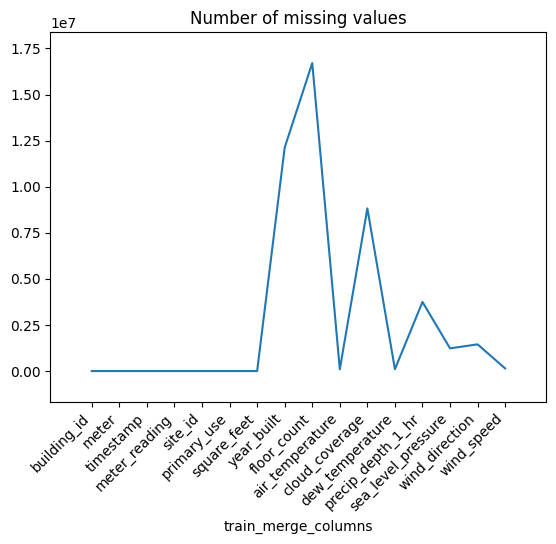

In [38]:
train_merge_columns=train_merge.columns
plt.plot(null_train_merge.index, null_train_merge['NaN count'])
plt.xticks(null_train_merge.index, null_train_merge.index, rotation=45,horizontalalignment='right')
plt.xlabel('train_merge_columns')
plt.title('Number of missing values')
plt.margins(0.1)
plt.show()

Visualising number of data 

<Axes: title={'center': 'Bar chart showing values in Columns of weather_train Dataset'}, xlabel='Column', ylabel='Number of Values'>

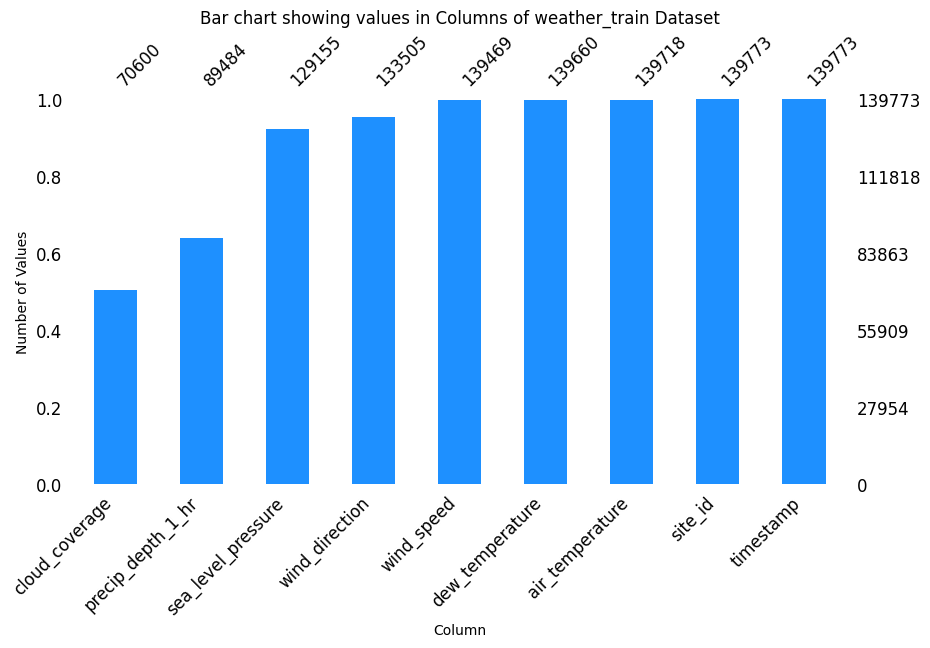

In [39]:
fig, ax = plt.subplots(1, 1, figsize=[20, 14])
ax.set_xlabel("Column")
ax.set_ylabel("Number of Values")
ax.set_title( 'Bar chart showing values in Columns of weather_train Dataset') 
msno.bar(weather_train_df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<Axes: title={'center': 'Bar chart showing values in Columns of building_meta Dataset'}, xlabel='Column', ylabel='Number of Values'>

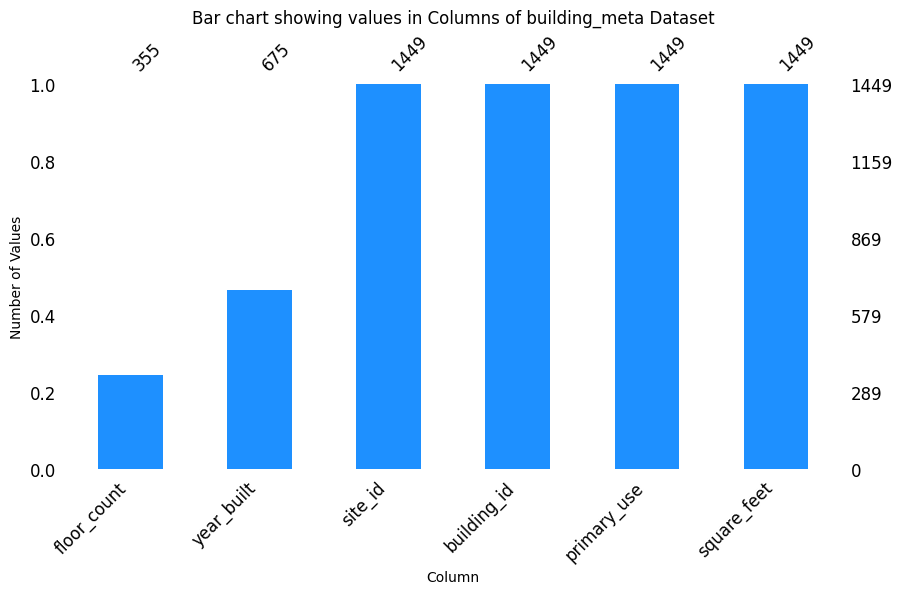

In [40]:
fig, ax = plt.subplots(1, 1, figsize=[20, 14])
ax.set_xlabel("Column")
ax.set_ylabel("Number of Values")
ax.set_title( 'Bar chart showing values in Columns of building_meta Dataset') 
msno.bar(building_meta_df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<Axes: title={'center': 'Bar chart showing values in Columns of train_merge Dataset'}, xlabel='Column', ylabel='Number of Values'>

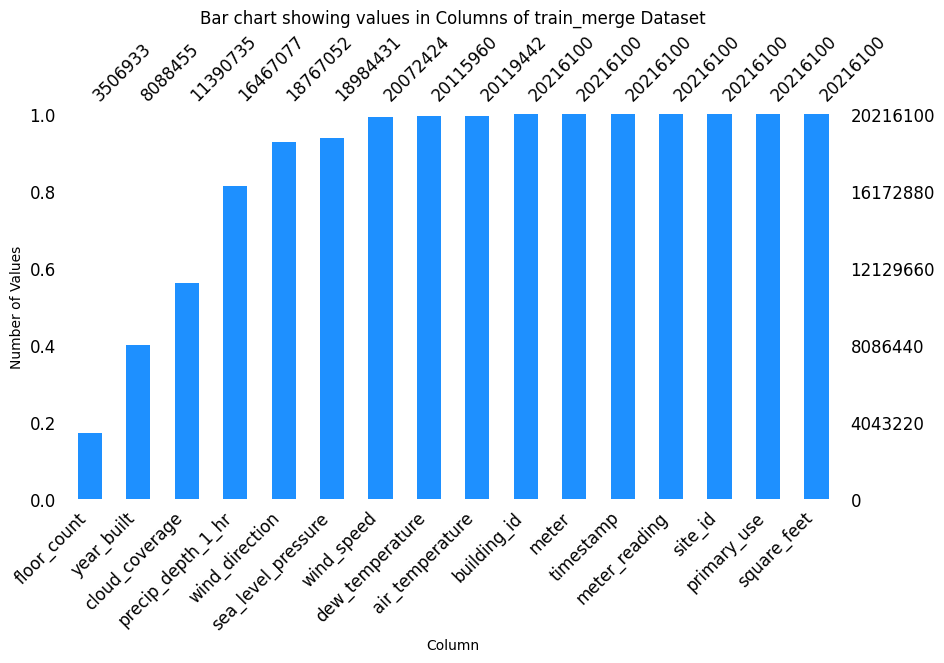

In [41]:
fig, ax = plt.subplots(1, 1, figsize=[20, 14])
ax.set_xlabel("Column")
ax.set_ylabel("Number of Values")
ax.set_title( 'Bar chart showing values in Columns of train_merge Dataset') 
msno.bar(train_merge,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

Outliers 

In [42]:
def boxplot_func(dFrame, fea_list):
  f, ax = plt.subplots(1, len(fea_list), figsize=(25,10))
  for i in range(len(fea_list)):
    sns.boxplot(data = dFrame[fea_list[i]], ax = ax[i])
    ax[i].set_xlabel(fea_list[i])

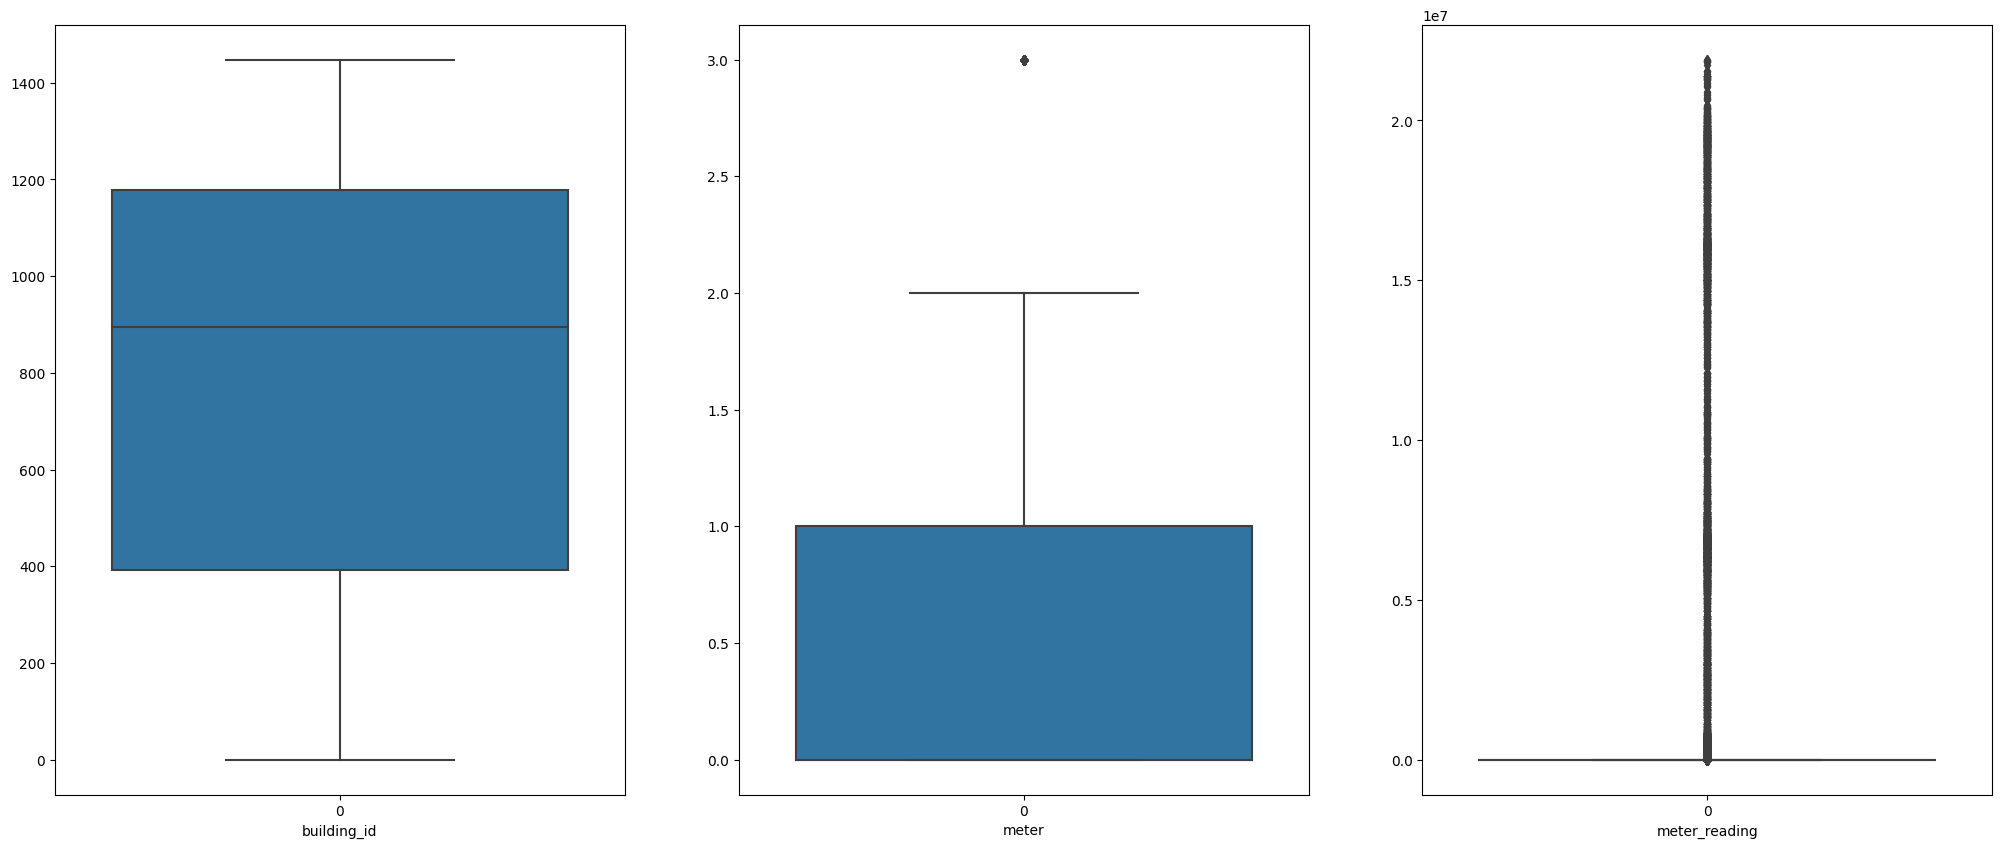

In [43]:
#outlier in train_df
boxplot_func(train_df,['building_id', 'meter', 'meter_reading'])
plt.show()

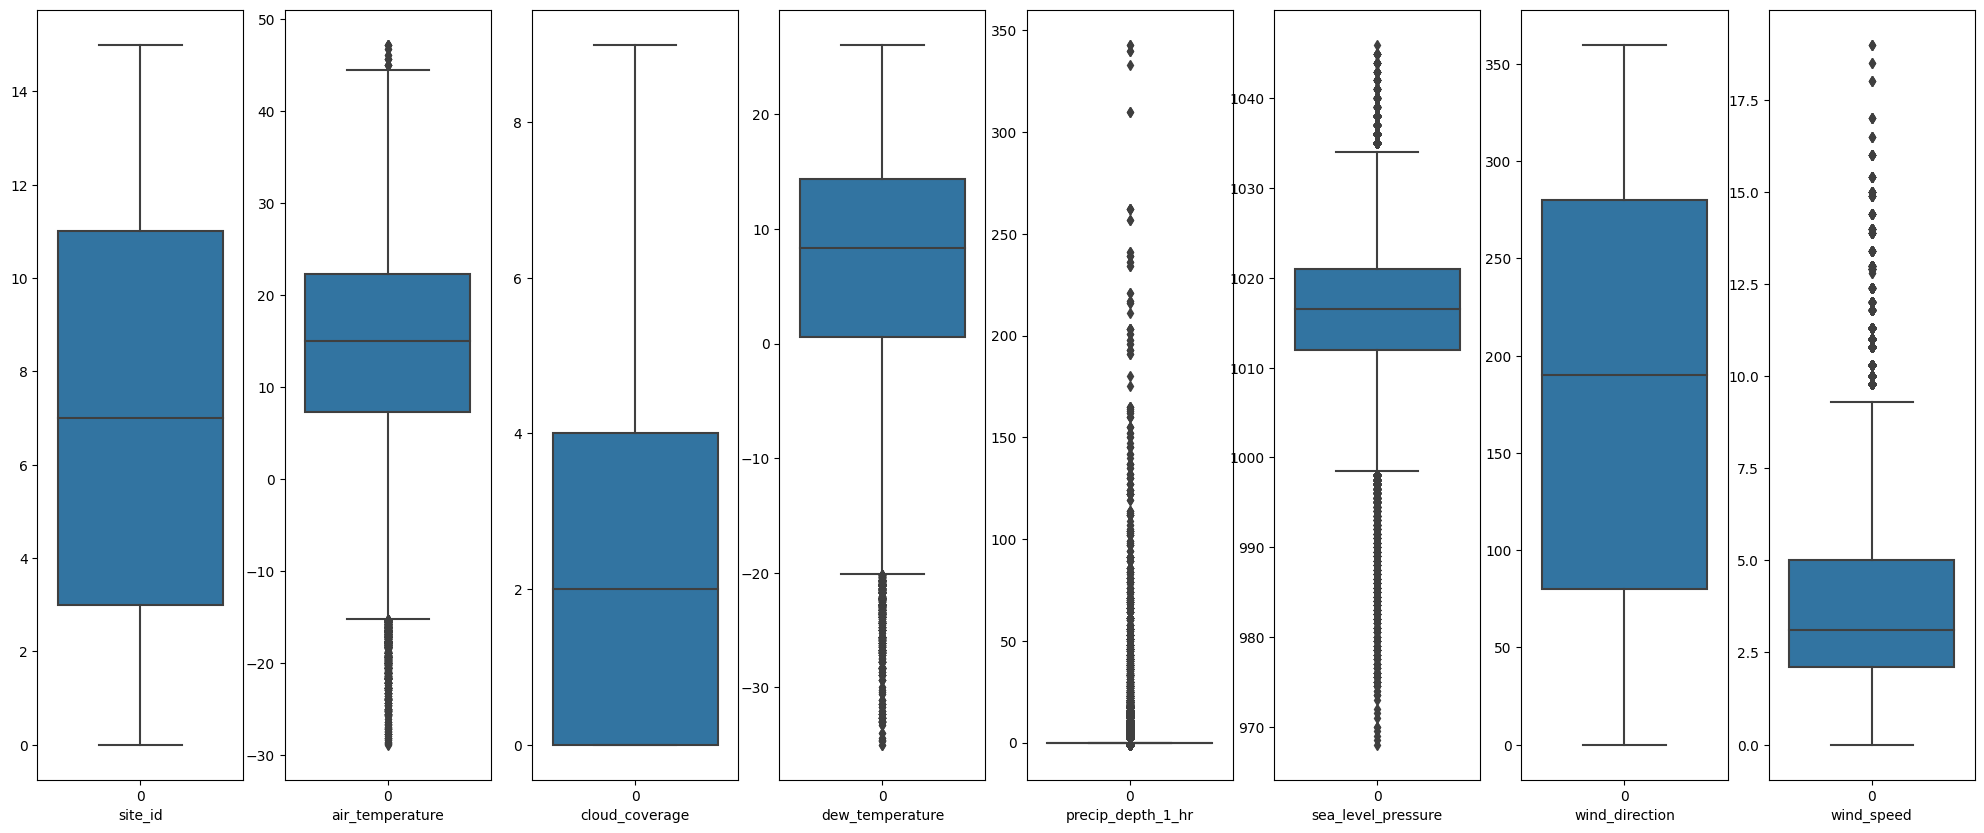

In [44]:
#outlier in weather_train_df
boxplot_func(weather_train_df,['site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'])
plt.show()

In [ ]:
min = np.min(weather_train_df)

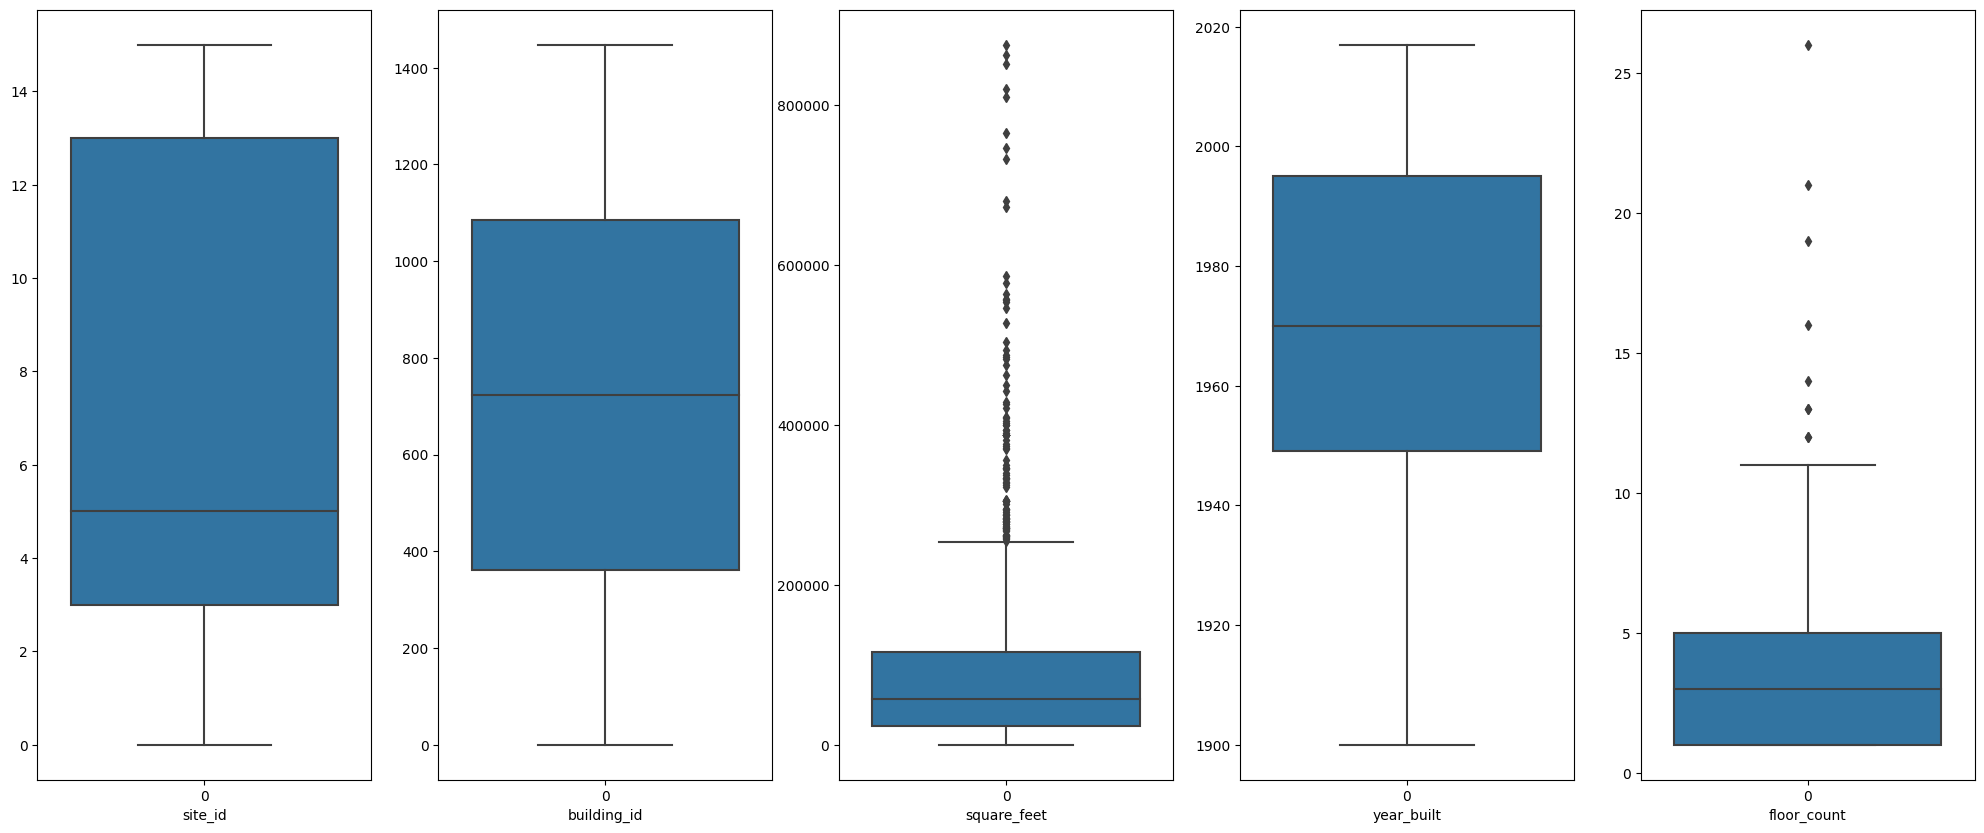

In [45]:
#outlier in building_meta_df
boxplot_func(building_meta_df,['site_id', 'building_id', 'square_feet', 'year_built',
       'floor_count'])
plt.show()

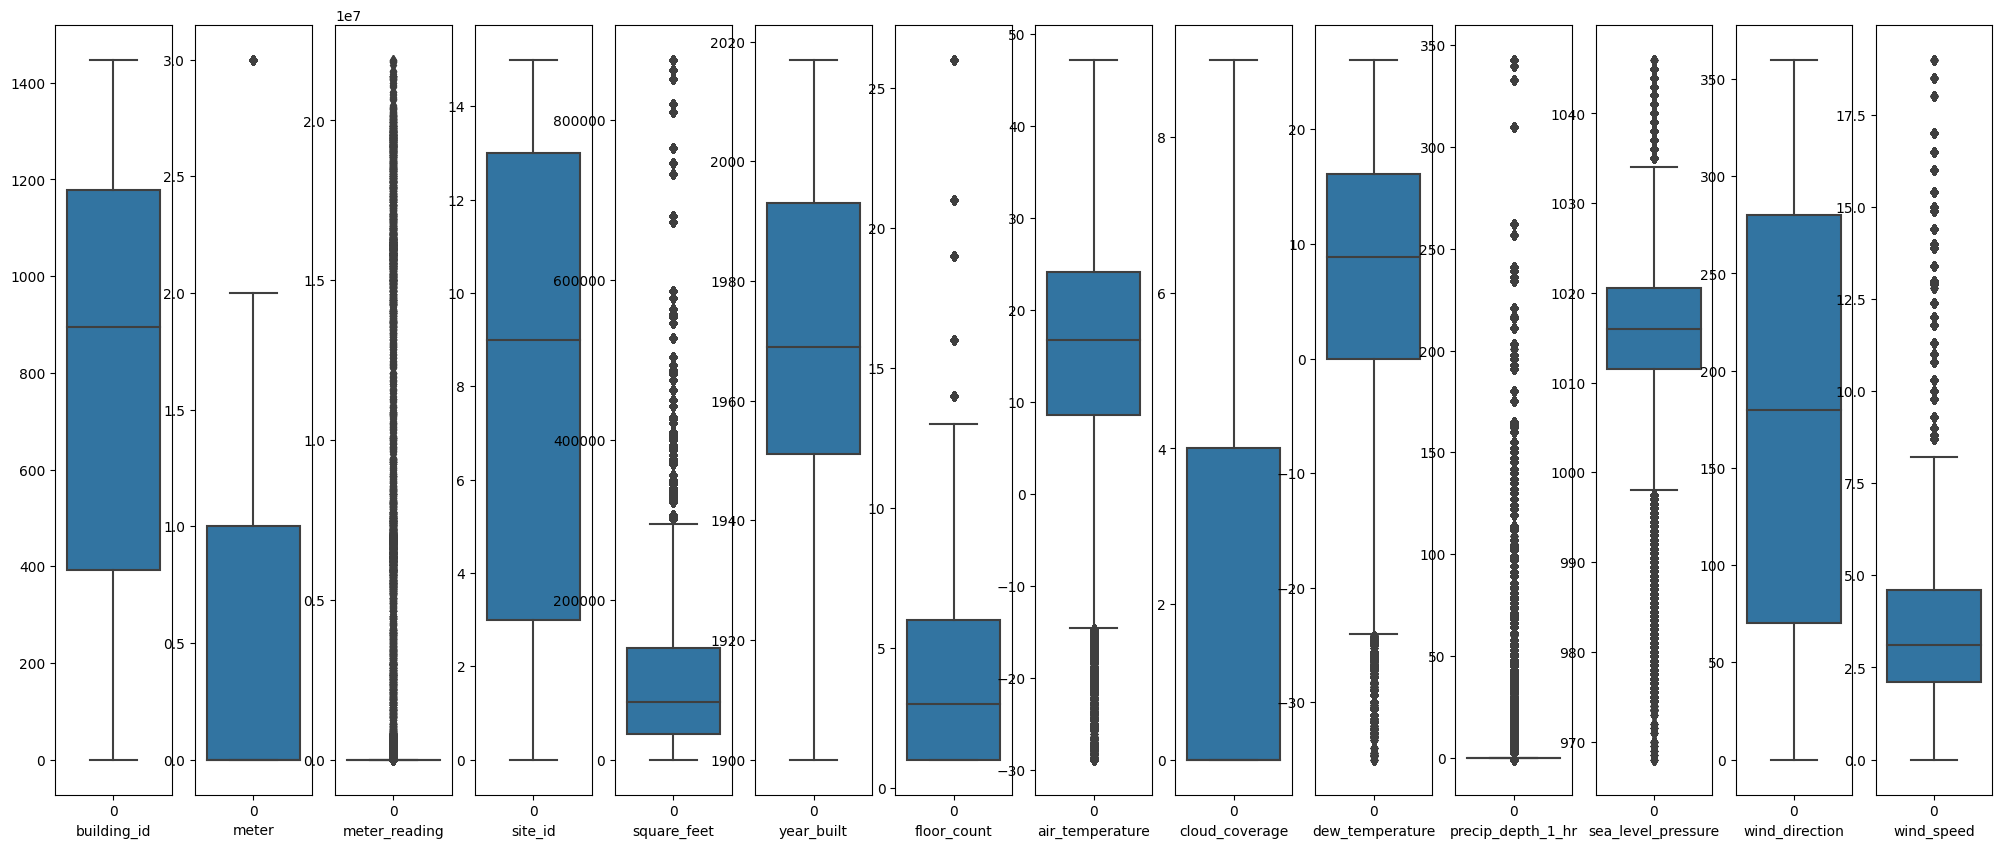

In [46]:
#outlier in train_merge
boxplot_func(train_merge,['building_id', 'meter', 'meter_reading', 'site_id',
       'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'])
plt.show()

In [47]:
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 10)
    ax = sns.distplot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('Count ', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title(' Distribution of '+'%s' %variable.name, fontsize = title_size)
    plt.show()

Breaking Timestamp into Hour, Day, Month, Year
(firstly converts timestamp to date and then breaks down date into 6 new columns: hour, day, dayOfWeek, dayOfYear, month and year)

In [48]:
def breakdown_timestamp(dataframe):
    
    dataframe['timestamp']= pd.to_datetime(dataframe['timestamp'])

    dataframe['hour']= np.uint8(dataframe['timestamp'].dt.hour)
    
    dataframe['day']= np.uint16(dataframe['timestamp'].dt.day)
    dataframe['dayofweek']= np.uint8(dataframe['timestamp'].dt.dayofweek)
    dataframe['dayofyear']= np.uint16(dataframe['timestamp'].dt.dayofyear)

    dataframe['month']= np.uint8(dataframe['timestamp'].dt.month)

    dataframe['year']= np.uint16(dataframe['timestamp'].dt.year)
    
    return dataframe

In [49]:
train_merge = breakdown_timestamp(train_merge)

In [50]:
print('New Shape of train_merge Data:',train_merge.shape)

New Shape of train_merge Data: (20216100, 22)


Basic Statistics 

In [51]:
train_merge["meter_reading"].describe()

count    2.021610e+07
mean     2.117122e+03
std      1.532356e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

In [103]:
train_merge['precip_depth_1_hr'].describe()

count    1.537372e+07
mean              NaN
std      0.000000e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.285156e-01
Name: precip_depth_1_hr, dtype: float64

In [71]:
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (20, 10)
    ax = sns.distplot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('Count ', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title(' Distribution of '+'%s' %variable.name, fontsize = title_size)
    plt.show()

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


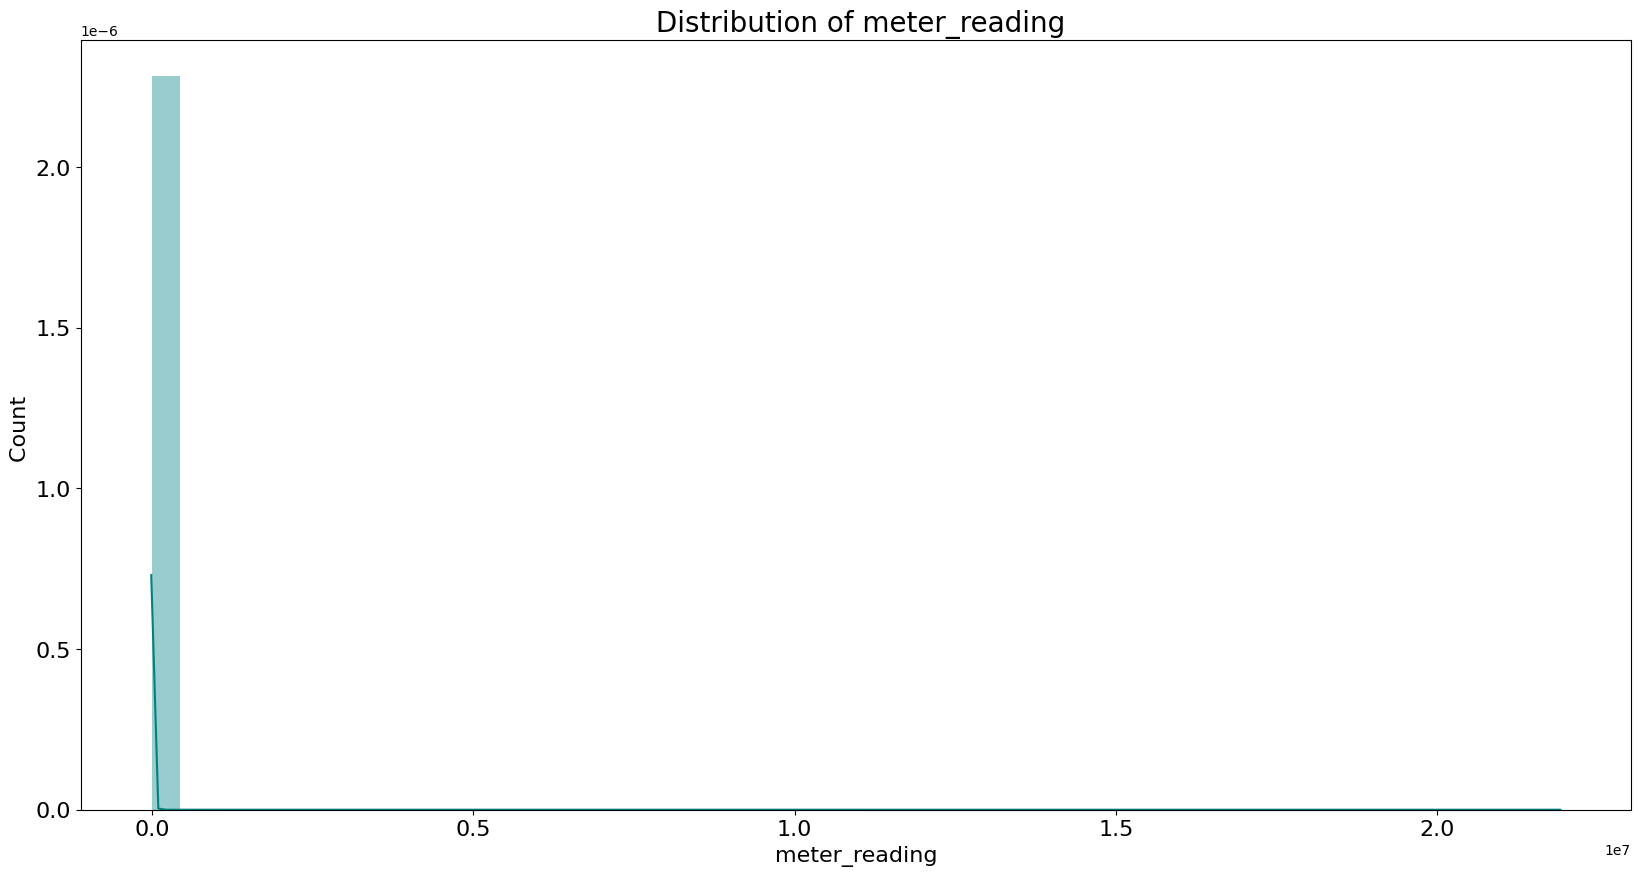

In [73]:
distplot(train_df['meter_reading'], 'teal')

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


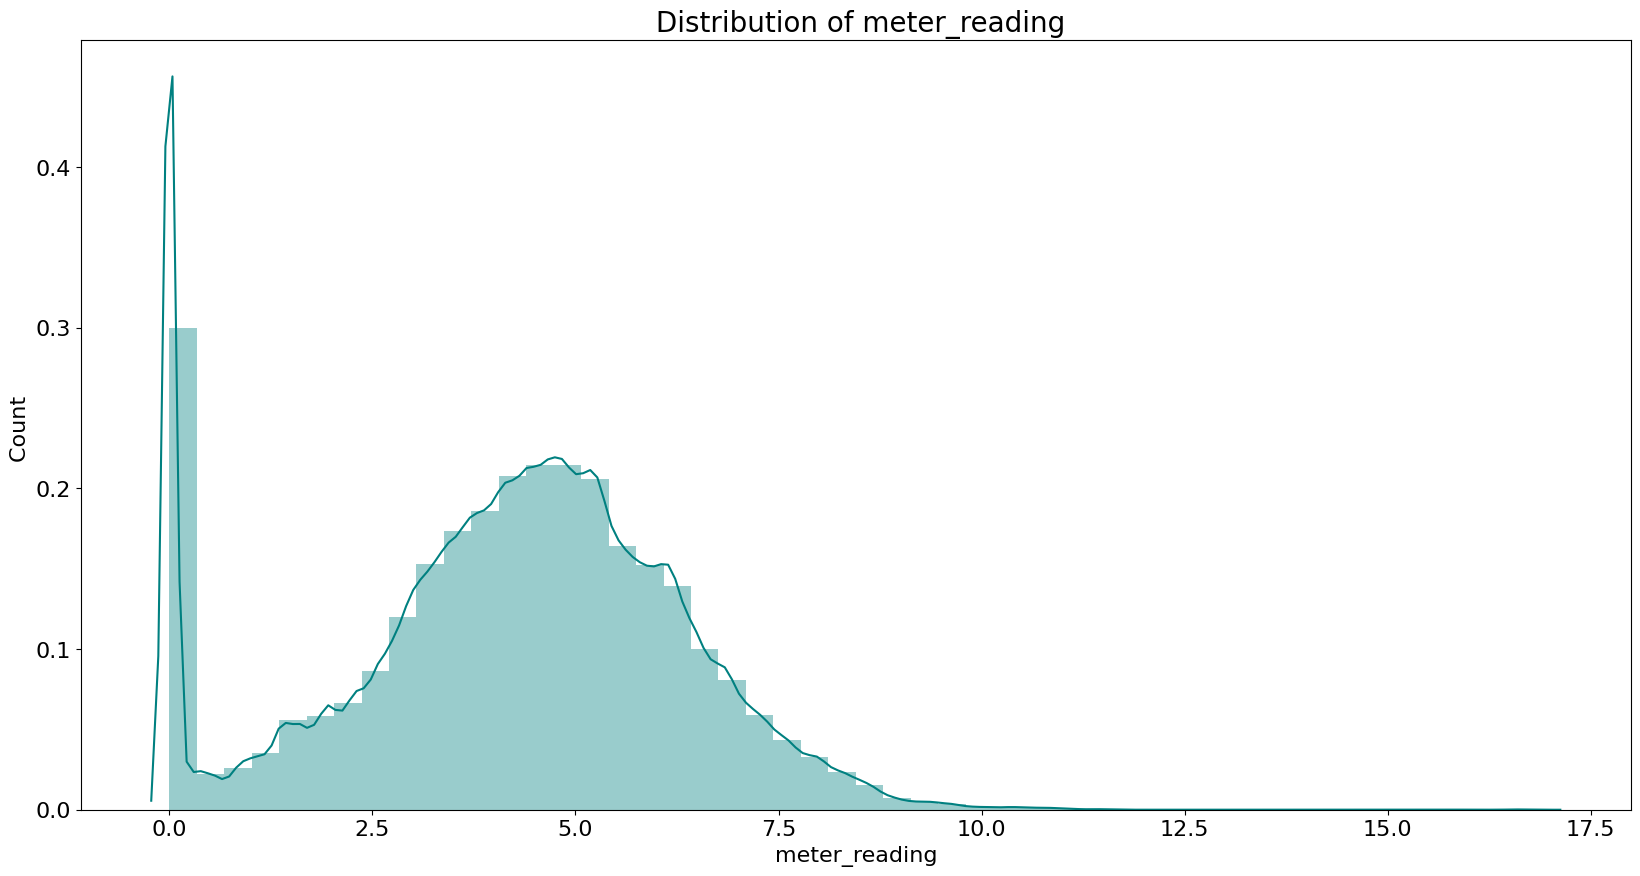

In [74]:
train_df['meter_reading'] = np.log1p(train_df['meter_reading'])
plt.title('**Distribution after log tranformation**')
distplot(train_df['meter_reading'], 'teal')

In [95]:
weather_train_df['precip_depth_1_hr']=weather_train_df['precip_depth_1_hr'][np.isfinite(weather_train_df['precip_depth_1_hr'])]

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


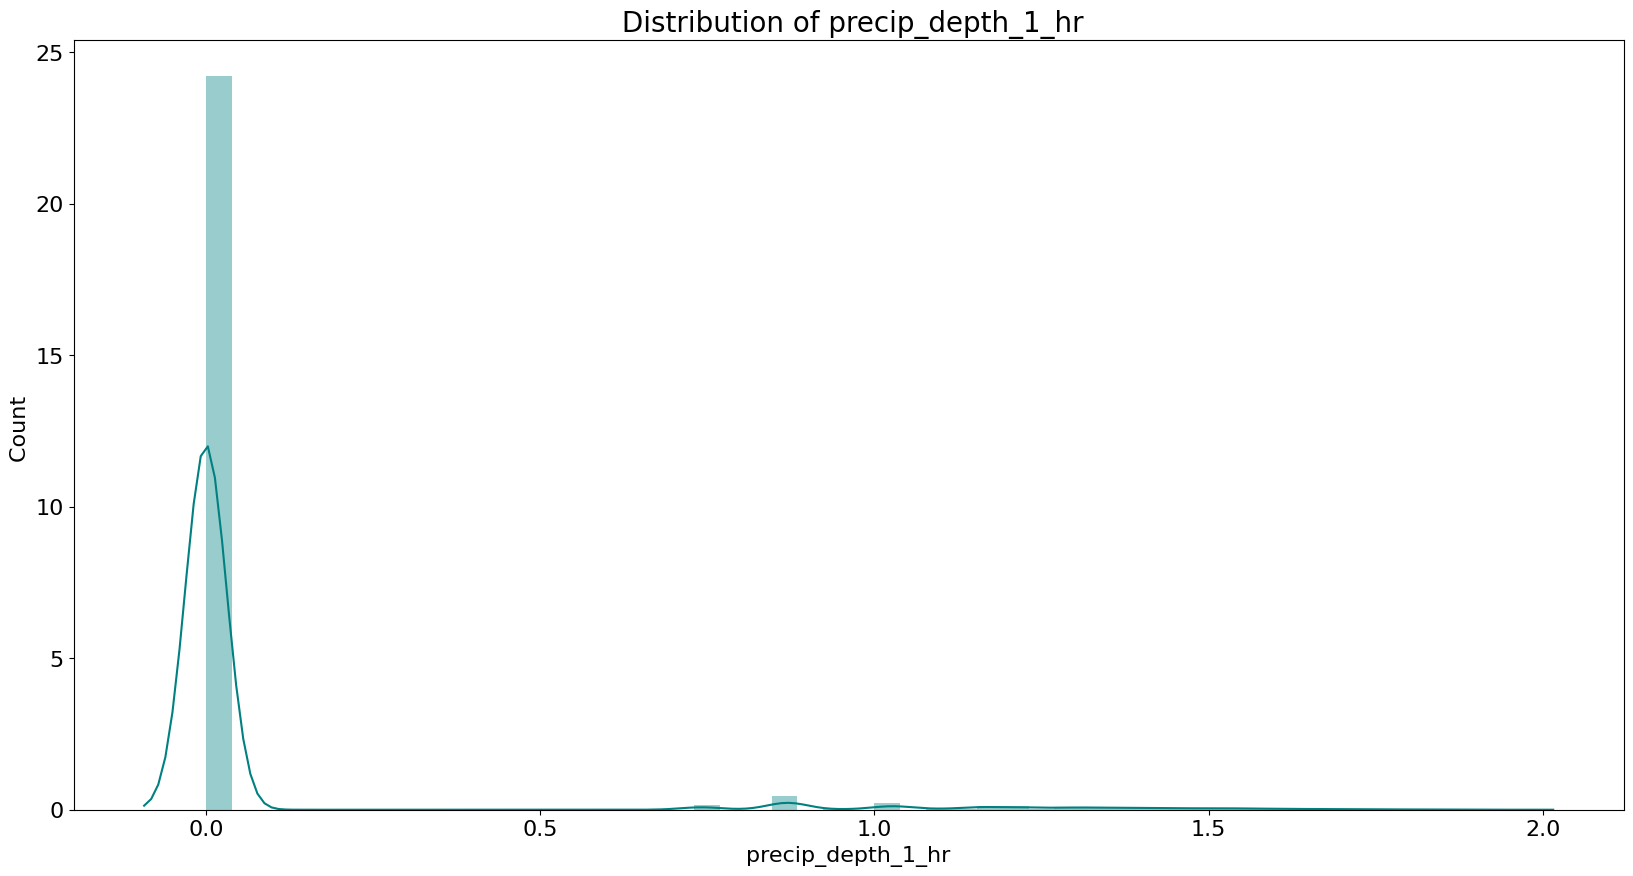

In [96]:
distplot(weather_train_df['precip_depth_1_hr'], 'teal')

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


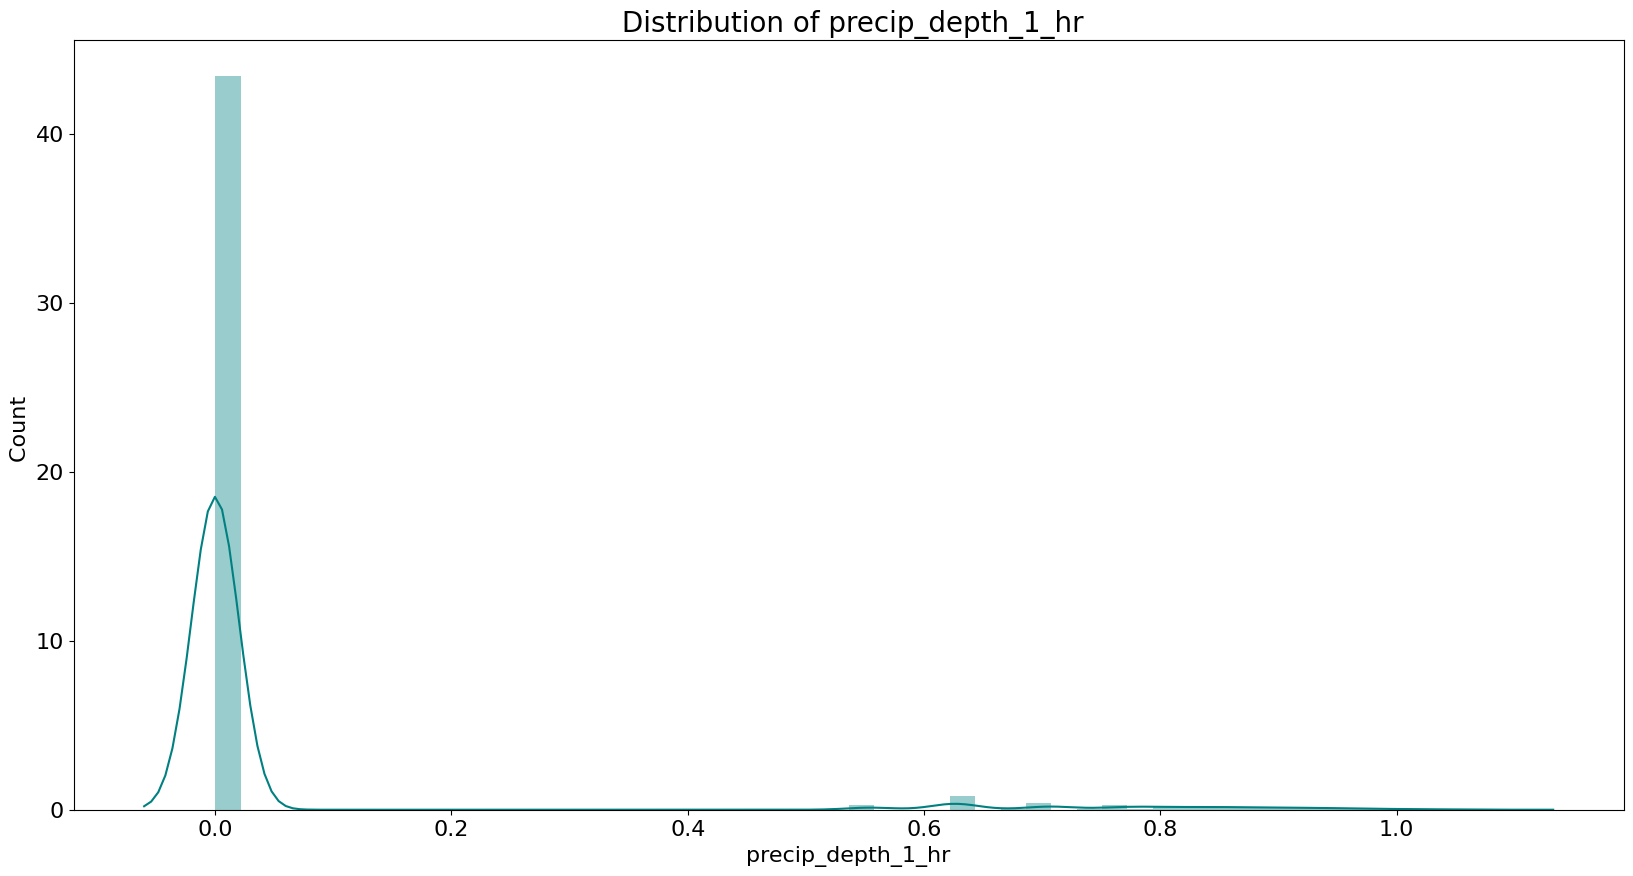

In [97]:
weather_train_df['precip_depth_1_hr'] = np.log1p(weather_train_df['precip_depth_1_hr'])
plt.title('**Distribution after log tranformation**')
distplot(weather_train_df['precip_depth_1_hr'], 'teal')

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


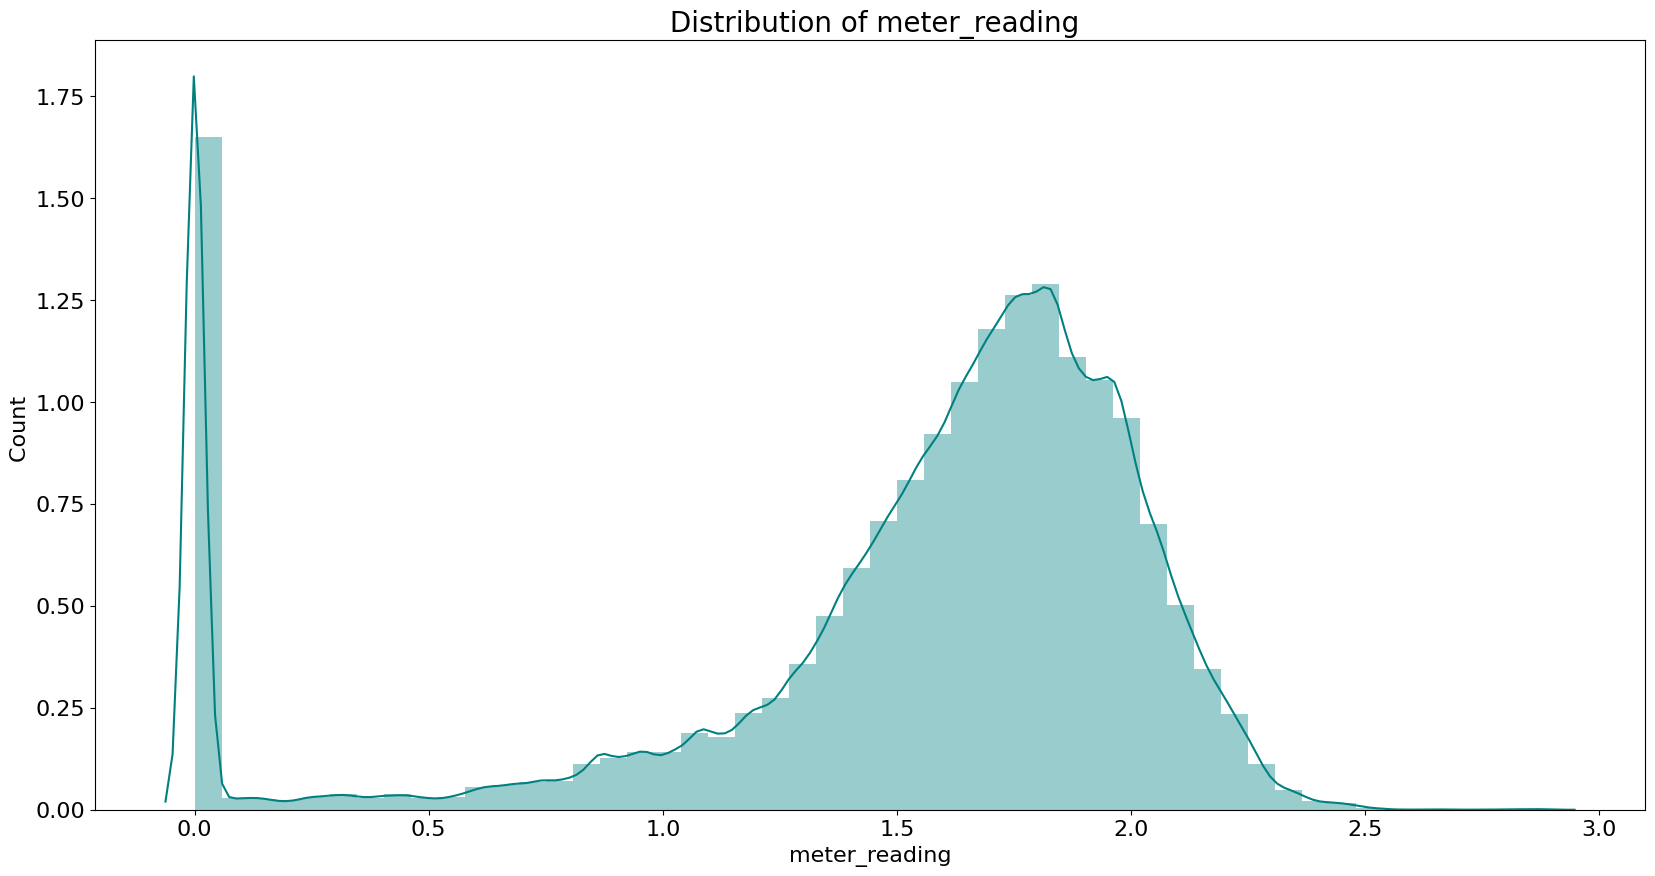

In [75]:
distplot(train_merge['meter_reading'], 'teal')

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


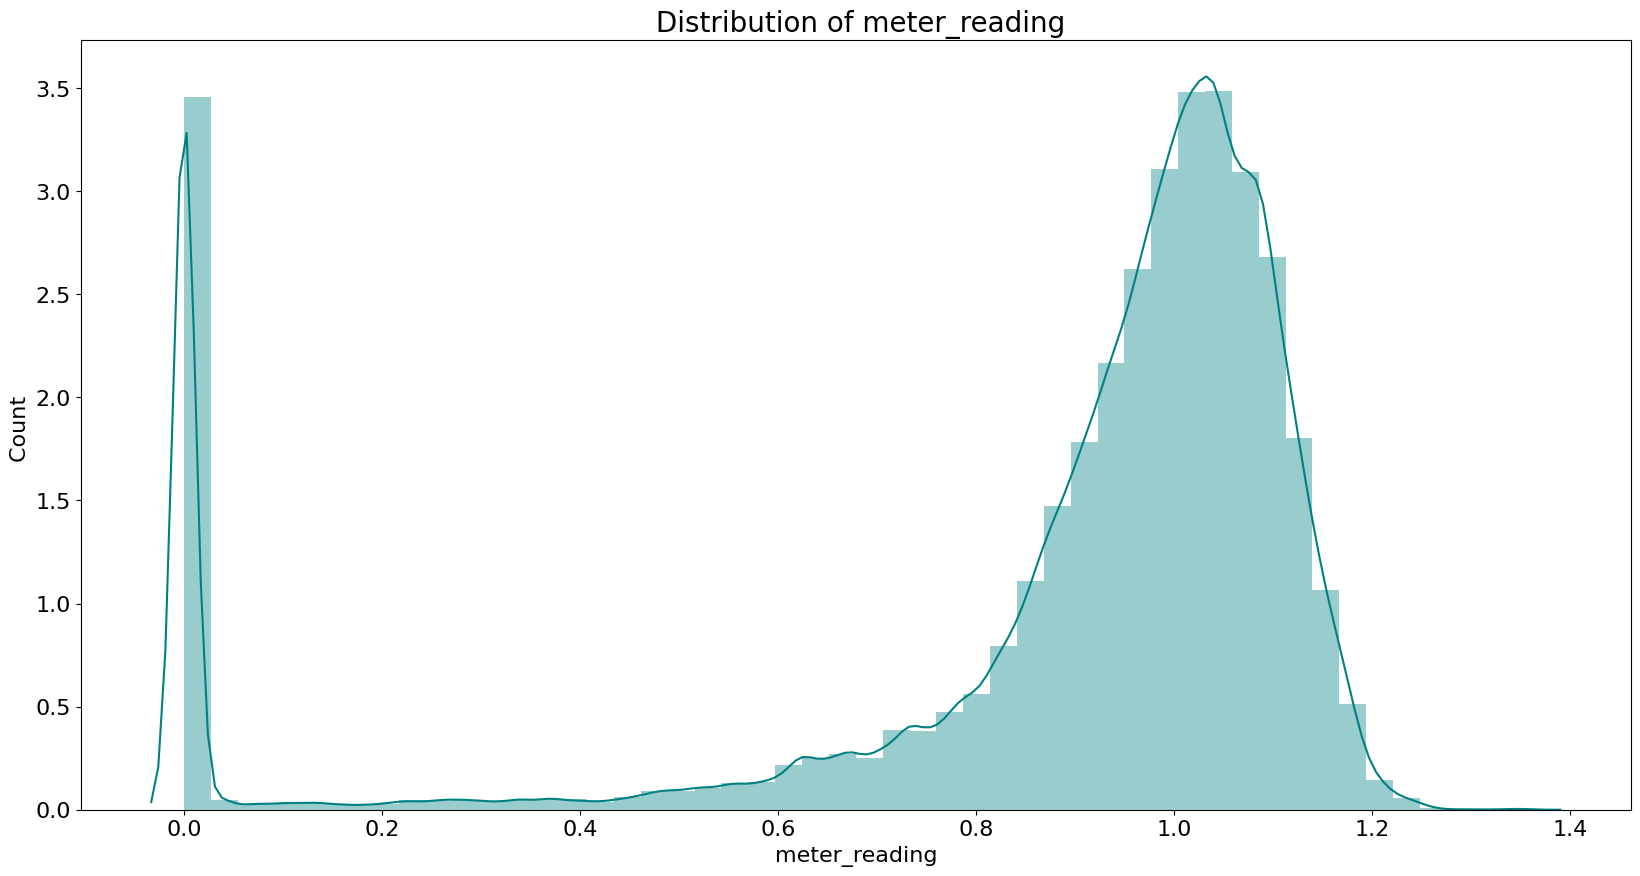

In [76]:
train_merge['meter_reading'] = np.log1p(train_merge['meter_reading'])
plt.title('**Distribution after log tranformation**')
distplot(train_merge['meter_reading'], 'teal')

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


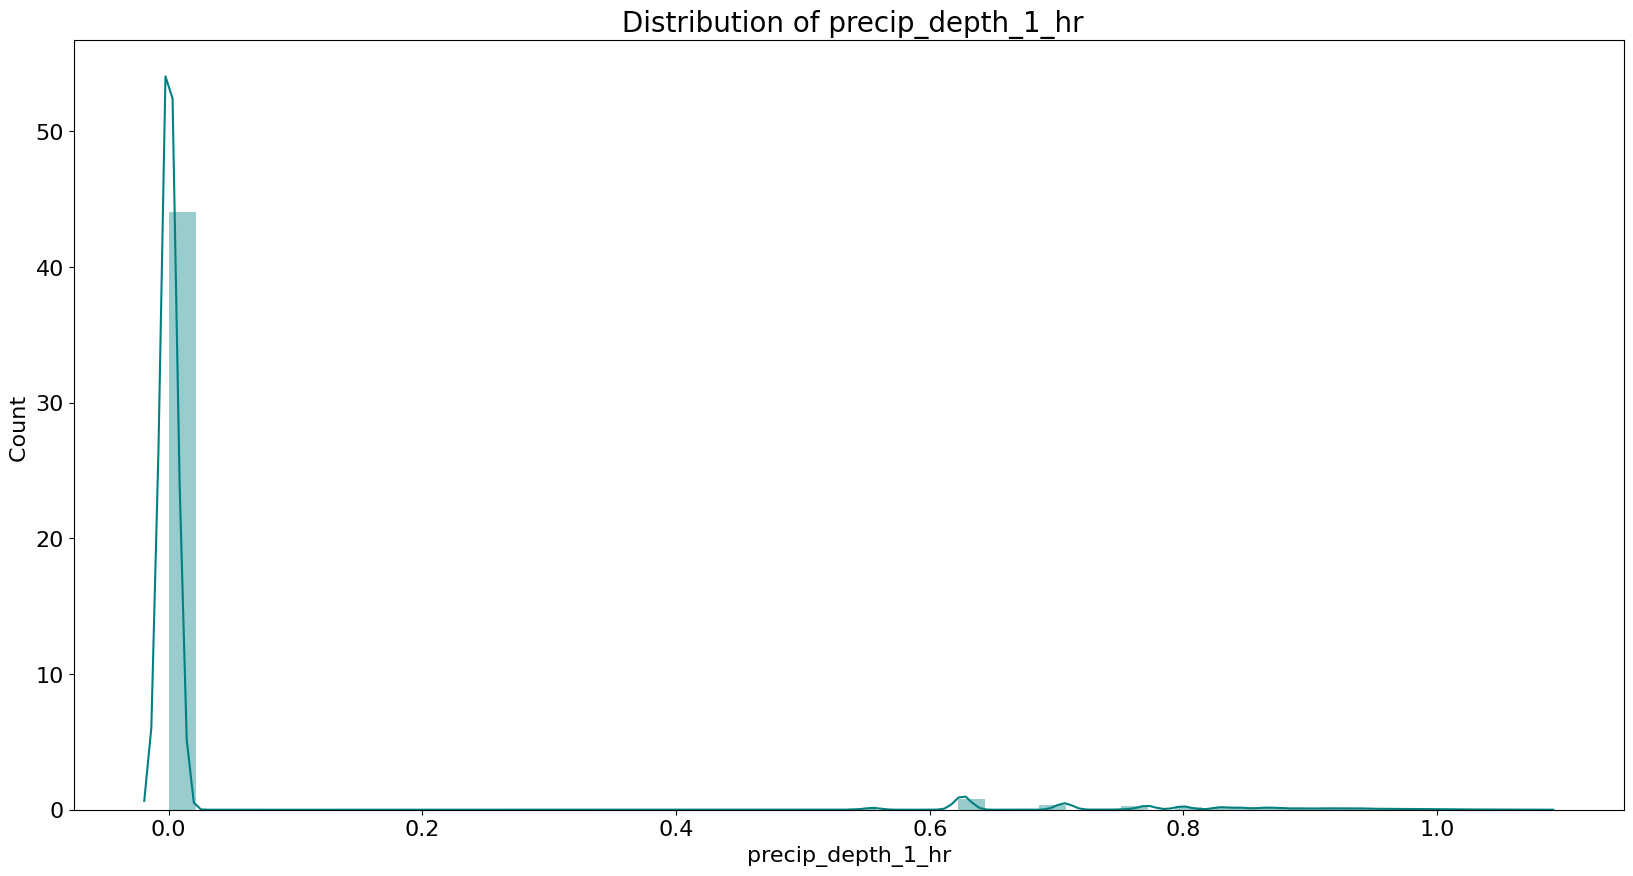

In [77]:
distplot(train_merge['precip_depth_1_hr'], 'teal')

/tmp/ipykernel_639/1486062783.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(variable, color = color)


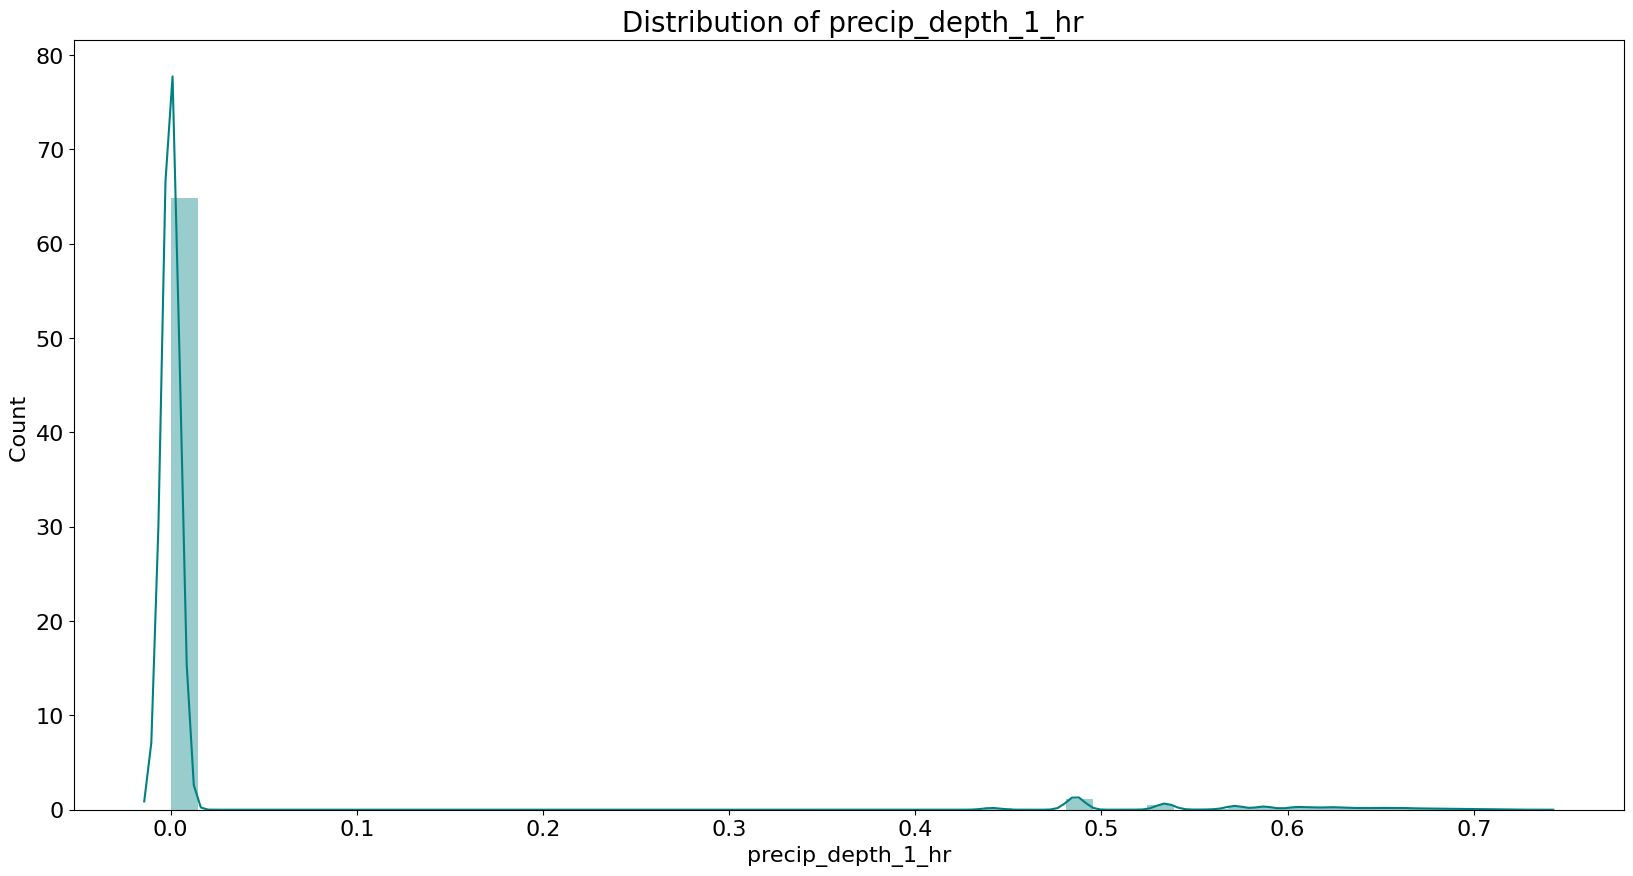

In [78]:
train_merge['precip_depth_1_hr'] = np.log1p(train_merge['precip_depth_1_hr'])
plt.title('**Distribution after log tranformation**')
distplot(train_merge['precip_depth_1_hr'], 'teal')

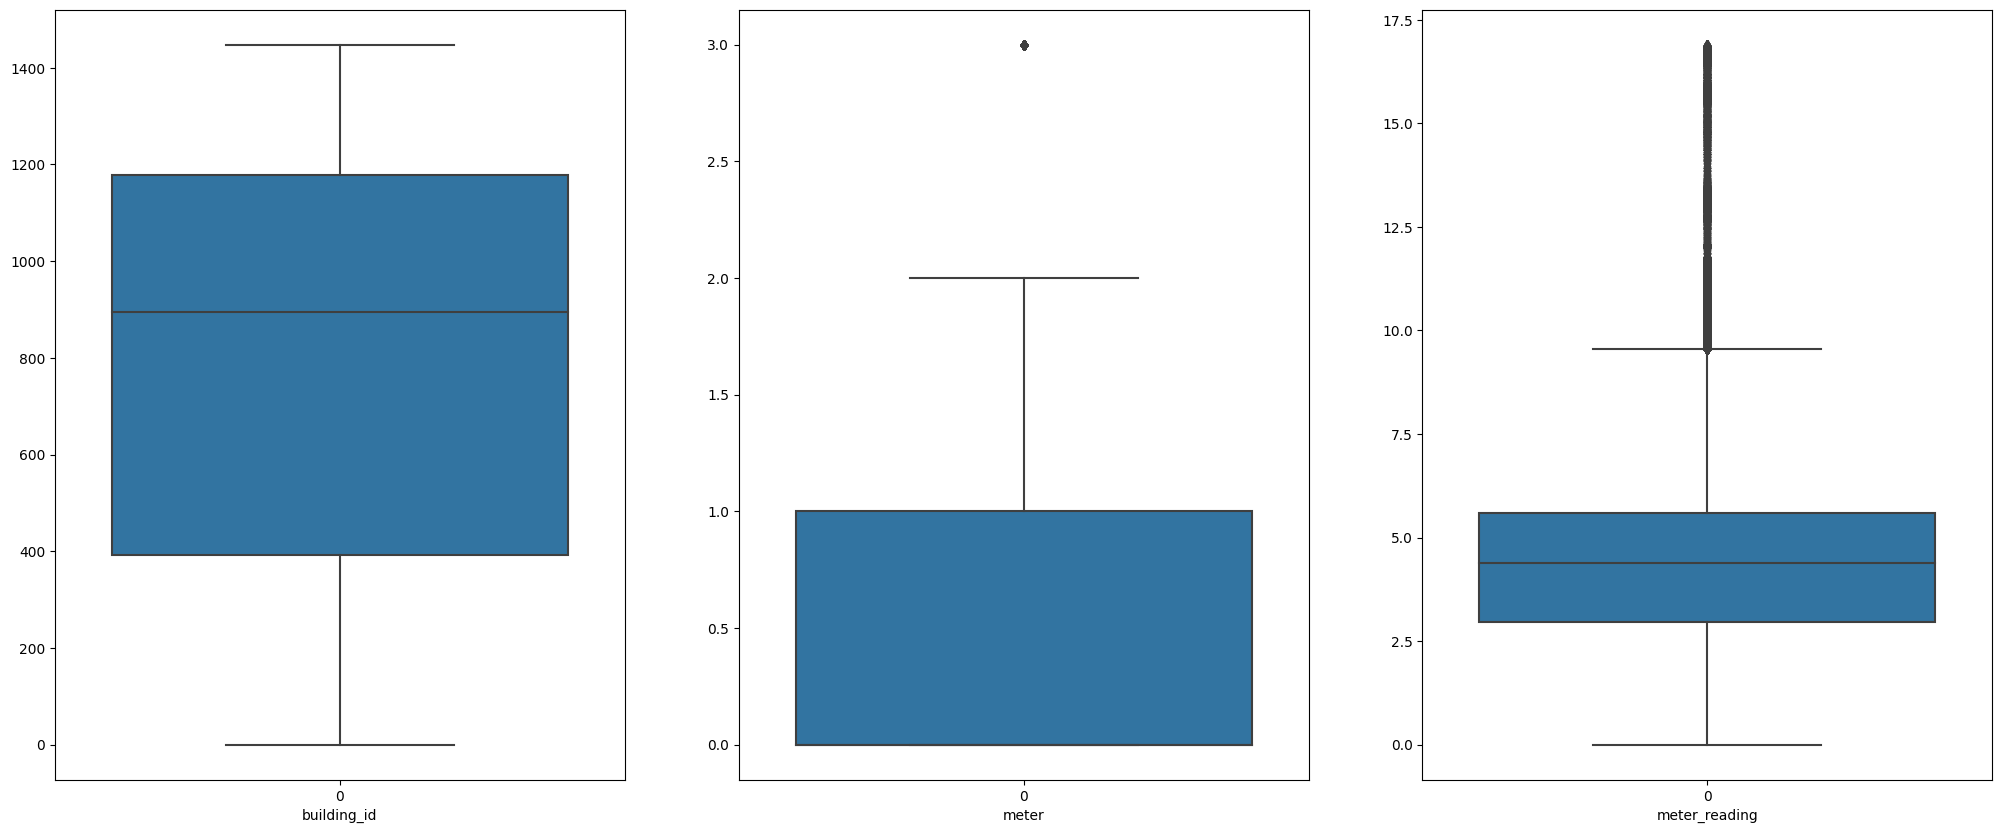

In [99]:
boxplot_func(train_df,['building_id', 'meter', 'meter_reading'])
plt.show()

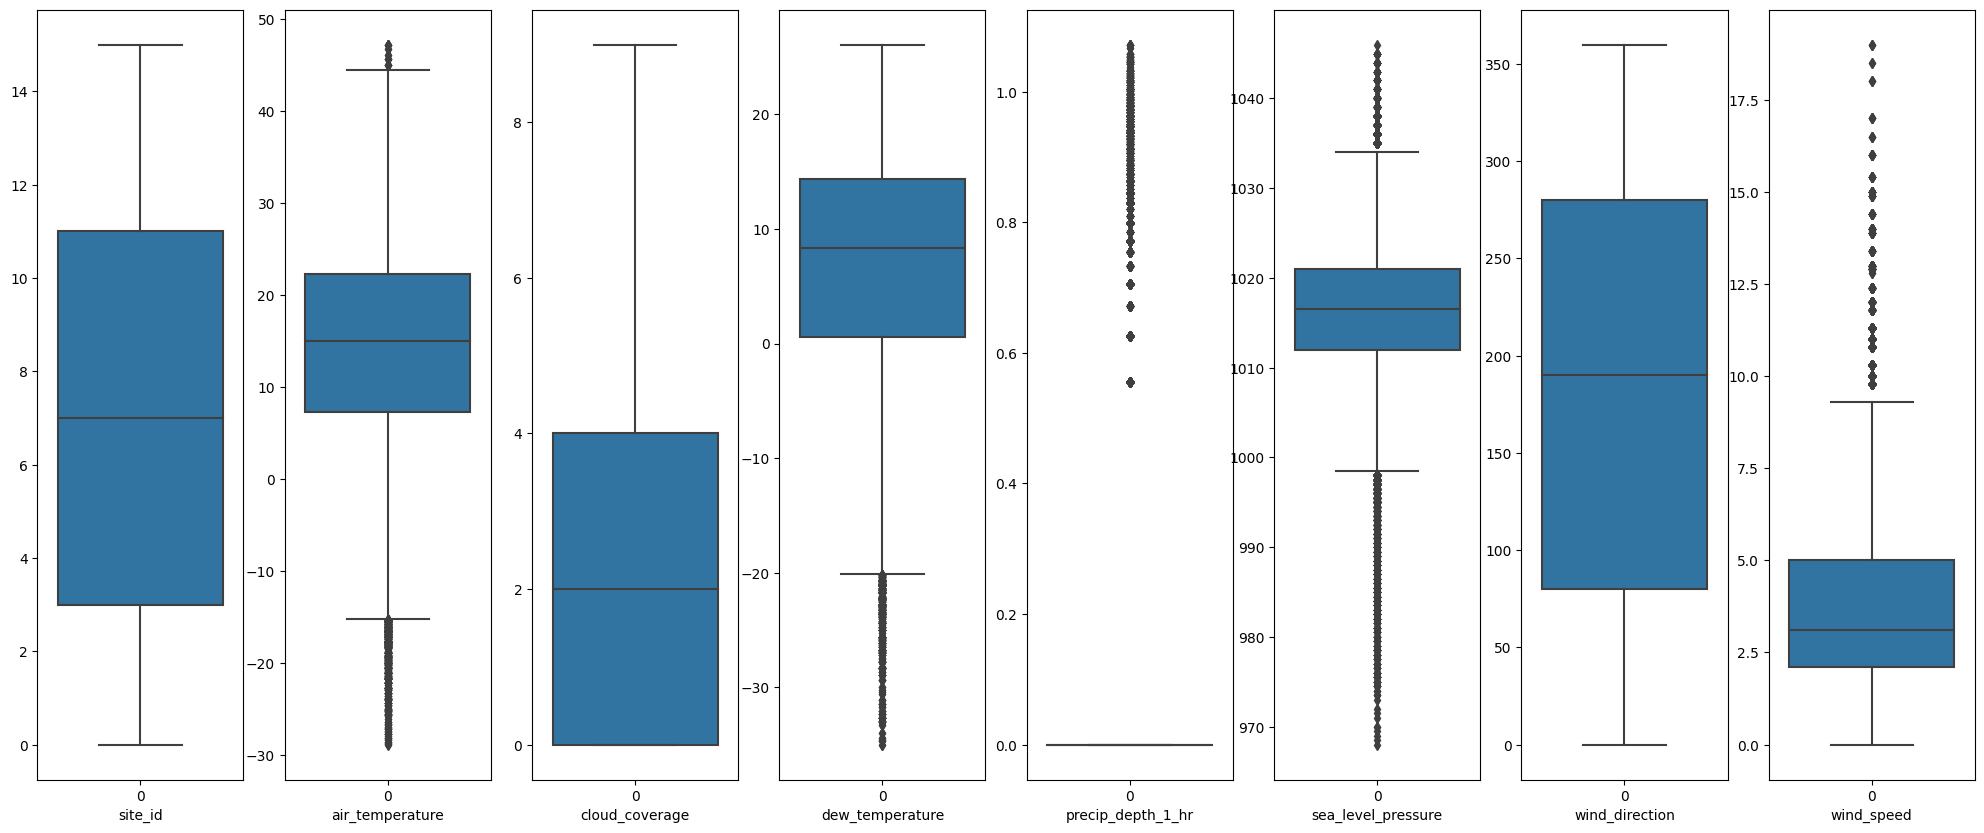

In [98]:
boxplot_func(weather_train_df,['site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'])
plt.show()

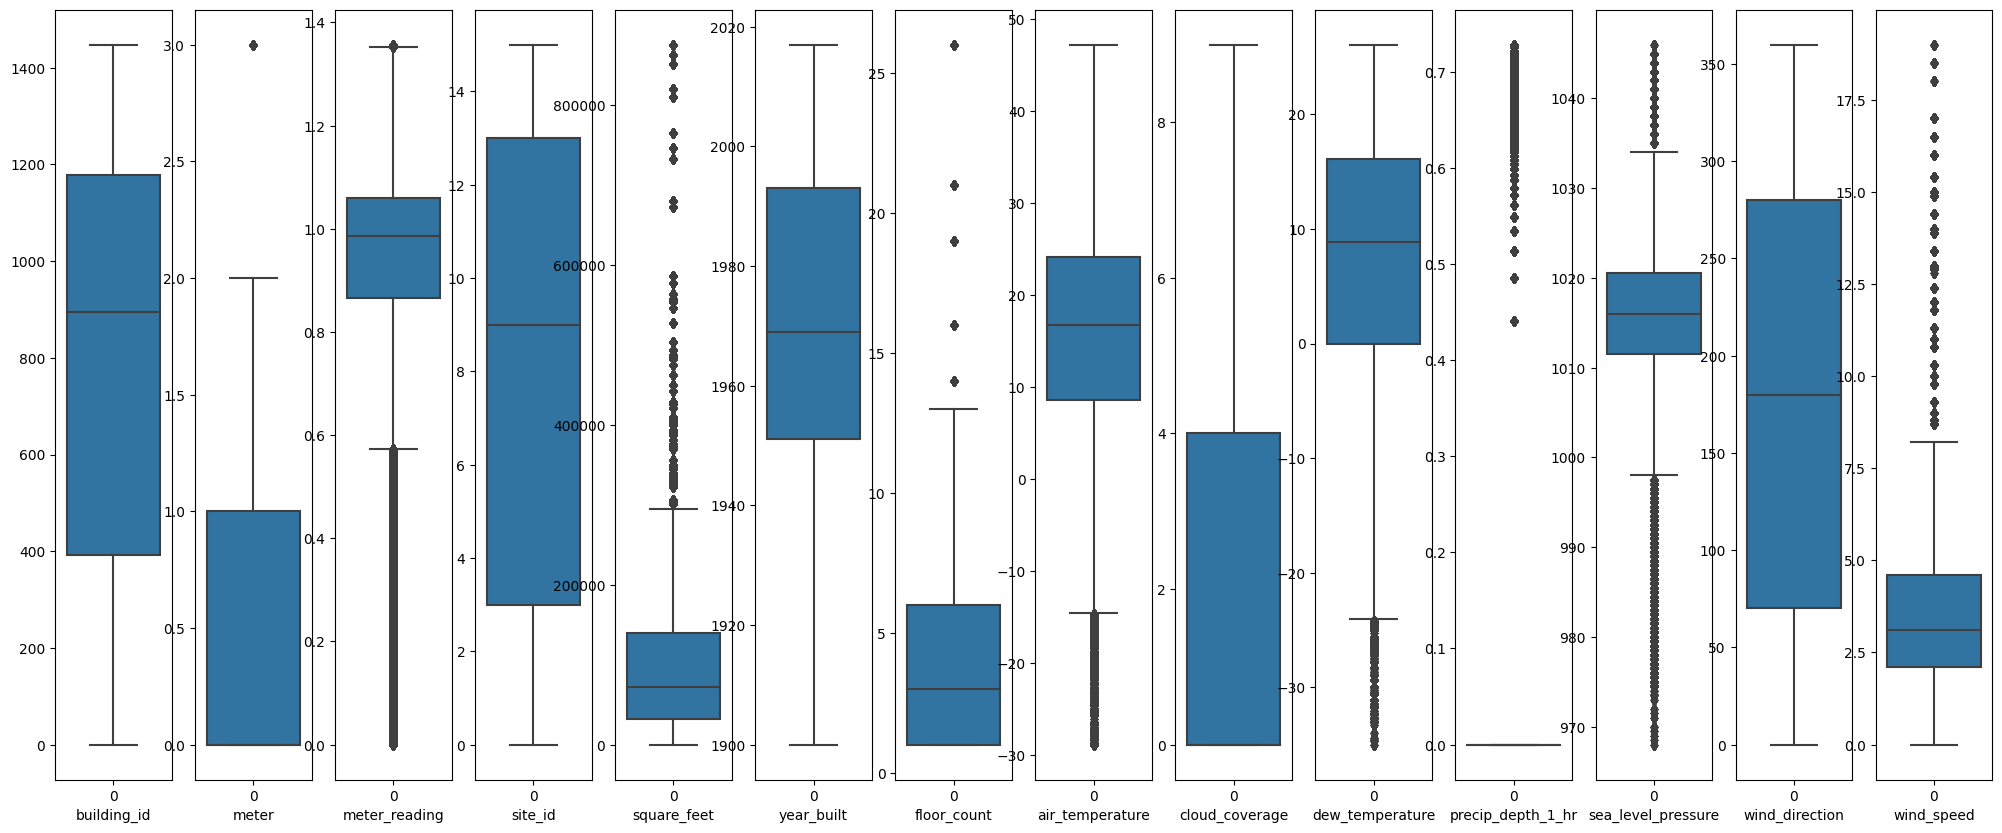

In [90]:
boxplot_func(train_merge,['building_id', 'meter', 'meter_reading', 'site_id',
       'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'])
plt.show()

In [101]:
print('---Summary of meter_reading after log transformation---')
train_merge["meter_reading"].describe()

---Summary of meter_reading after log transformation---


count    2.021610e+07
mean     8.749404e-01
std      3.213304e-01
min      0.000000e+00
25%      8.655323e-01
50%      9.867647e-01
75%      1.059961e+00
max      1.357103e+00
Name: meter_reading, dtype: float64

In [102]:
print('---Summary of meter_reading after log transformation---')
train_merge['precip_depth_1_hr'].describe()

---Summary of meter_reading after log transformation---


count    1.537372e+07
mean              NaN
std      0.000000e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.285156e-01
Name: precip_depth_1_hr, dtype: float64